In [38]:
import pandas as pd

dataset_analysis = pd.read_csv('Documents/PhenoCam_data/full_timeperiod.csv')


dataset_analysis = dataset_analysis.loc[dataset_analysis['phases4'] != '0']
df = dataset_analysis[['elev', 'GDD', 'GDD_90', 'CDD',
                 'rainfall_90', 'rainfall_120', 'dayl..s.', 'FD',
         'HD', 'HRD', 'avg_rainfall', 'semi_arid', 
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]

df_y = dataset_analysis[['phases4','elev', 'GDD', 'GDD_90', 'CDD',
                 'rainfall_90', 'rainfall_120', 'dayl..s.', 'FD',
         'HD', 'HRD', 'avg_rainfall', 'semi_arid', 
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]



df = df.dropna()
df_y = df_y.dropna()
df_y = df_y[['phases4']]
print(df.count())
print(df_y.count())

elev                207688
GDD                 207688
GDD_90              207688
CDD                 207688
rainfall_90         207688
rainfall_120        207688
dayl..s.            207688
FD                  207688
HD                  207688
HRD                 207688
avg_rainfall        207688
semi_arid           207688
FDxElev             207688
srad_60_shift_30    207688
srad_30             207688
HDxrain             207688
vpd_30              207688
vpd_60_shift_30     207688
lat                 207688
lon                 207688
dtype: int64
phases4    207688
dtype: int64


In [48]:
b, c = np.unique(dataset_analysis['phases4'], return_inverse=True)
print(c)
dataset_analysis['phases4_int'] = c
dataset_analysis['phases4_int']

[0 0 0 ... 0 0 0]


0         0
1         0
2         0
3         0
4         0
         ..
221871    0
221872    0
221873    0
221874    0
221875    0
Name: phases4_int, Length: 221876, dtype: int64

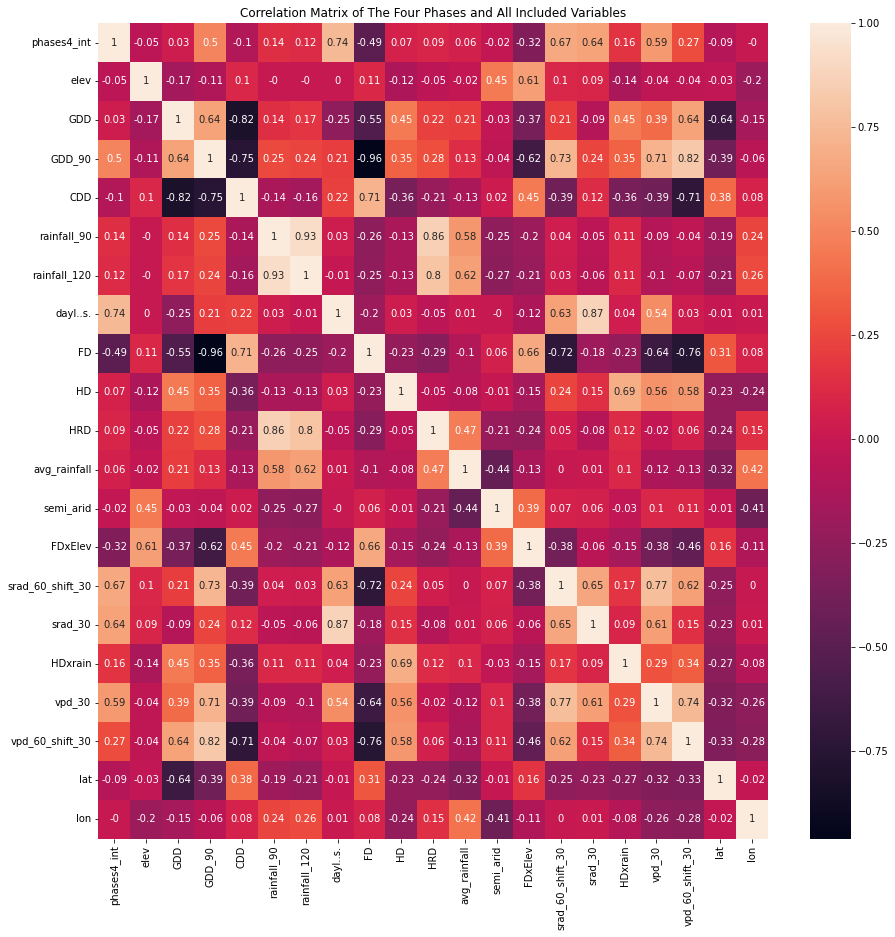

In [49]:
import seaborn as sb
df_p = dataset_analysis[['phases4_int', 'elev', 'GDD', 'GDD_90', 'CDD',
                 'rainfall_90', 'rainfall_120', 'dayl..s.', 'FD',
         'HD', 'HRD', 'avg_rainfall', 'semi_arid', 
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]


plt.figure(figsize = (15,15))

matrix = df_p.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.title('Correlation Matrix of The Four Phases and All Included Variables')
plt.show()


In [50]:
dataset_analysis[['site', 'year']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1).nunique()

650

In [39]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
import plotly.graph_objects as go
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [40]:
X = df.values # getting all values as a matrix of dataframe 
y = df_y.values
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
y

array([['rising'],
       ['rising'],
       ['rising'],
       ...,
       ['dormant'],
       ['dormant'],
       ['dormant']], dtype=object)

In [41]:
 ##Load and split data

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y.astype(str), test_size=0.25, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()

### USE THIS TO LOOK AT MODELS W PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_std)
# X_pca.shape

# X_train, X_test, y_train, y_test = train_test_split(
#     X_pca, y.astype(str), test_size=0.25, random_state=0)
# y_train = y_train.ravel()
# y_test = y_test.ravel()

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
ys = clf.predict(X_test)
print(clf.get_depth())
print(clf.get_n_leaves())
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()

print(summary)


27
3985
actuals    dormant  falling  fullgreen  rising
0                                             
dormant      25199      175          9     164
falling        167     2557        199       2
fullgreen       23      203      21760     148
rising         184        1        128    1694


In [42]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20))
clf = clf.fit(X_train, y_train)
ys = clf.predict(X_test)
# print(clf.get_depth())
# print(clf.get_n_leaves())
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()


print(summary)
summary.apply(lambda x: x/x.sum(), axis=1)

actuals    dormant  falling  fullgreen  rising
0                                             
dormant    25141.0     77.0        NaN    83.0
falling       96.0   2655.0       81.0     NaN
fullgreen      NaN     83.0    21757.0    87.0
rising        73.0      NaN       66.0  1723.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.993676,0.003043,NaN,0.003281
falling,0.033898,0.937500,0.028602,NaN
fullgreen,NaN,0.003785,0.992247,0.003968
rising,0.039205,NaN,0.035446,0.925349


In [77]:
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()

summary

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,24993.0,188.0,21.0,145.0
falling,167.0,2446.0,168.0,NaN
fullgreen,14.0,181.0,21580.0,144.0
rising,136.0,NaN,135.0,1604.0


In [9]:
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()

summary

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,11461.0,178.0,9.0,79.0
falling,170.0,2783.0,186.0,NaN
fullgreen,4.0,225.0,21016.0,102.0
rising,80.0,NaN,101.0,973.0


In [78]:
summary.apply(lambda x: x/x.sum(), axis=1)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.986034,0.007417,0.000829,0.005721
falling,0.060050,0.879540,0.060410,NaN
fullgreen,0.000639,0.008258,0.984534,0.006570
rising,0.072533,NaN,0.072000,0.855467


In [72]:
# summary.apply(lambda x: x/x.sum(), axis=1)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.986658,0.007303,0.000434,0.005605
falling,0.059558,0.873752,0.066690,NaN
fullgreen,0.000913,0.008216,0.984481,0.006390
rising,0.068230,NaN,0.073028,0.858742


In [43]:
from sklearn.inspection import permutation_importance

import time

# feature _names = [f"feature {i}" for i in range(X.shape[1])]
# feature_names =['elev', 'GDD', 'GDD_90', 
#                   'rainfall_90', 'dayl..s.',
#          'HD', 'HRD', 'avg_rainfall', 'semi_arid',
#        'FDxElev',  'srad_60_shift_30', 'srad_30', 
#        'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']


feature_names = ['elev', 'GDD', 'GDD_90', 'CDD',
                 'rainfall_90', 'rainfall_120', 'dayl..s.', 'FD',
         'HD', 'HRD', 'avg_rainfall', 'semi_arid', 
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']

In [44]:
import time
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 67.334 seconds


In [45]:
forest_importances = forest_importances.sort_values(ascending=False)


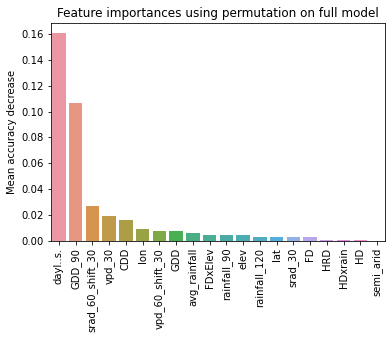

In [46]:
fig, ax = plt.subplots()
sb.barplot(y = forest_importances.values,
#     yerr= result.importances_std, 
                            x = forest_importances.index
#            , cmap="YlGnBu"
          )
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation = 90)
# fig.tight_layout()
plt.show()

random forests


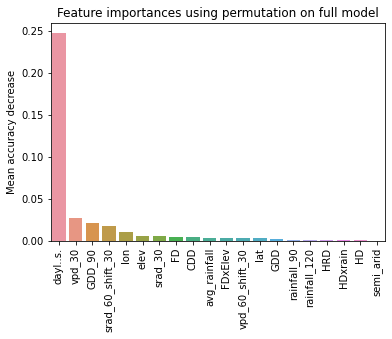

In [197]:
print("random forests")
fig, ax = plt.subplots()
sb.barplot(y = forest_importances.values,
#     yerr= result.importances_std, 
                            x = forest_importances.index
#            , cmap="YlGnBu"
          )
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation = 90)
# fig.tight_layout()
plt.show()

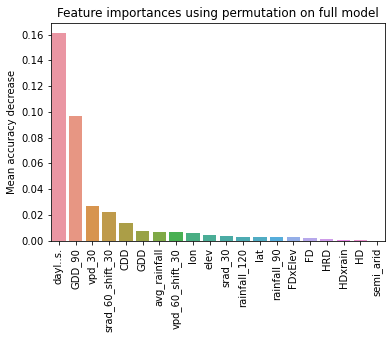

In [201]:
fig, ax = plt.subplots()
sb.barplot(y = forest_importances.values,
#     yerr= result.importances_std, 
                            x = forest_importances.index
#            , cmap="YlGnBu"
          )
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation = 90)
# fig.tight_layout()
plt.show()

In [ ]:
df = dataset_analysis[['elev', 'GDD', 'GDD_90', 
                 'CDD', 'rainfall_90', 'dayl..s.',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]

df_y = dataset_analysis[['phases4', 'elev', 'GDD', 'GDD_90', 
                 'CDD', 'rainfall_90', 'dayl..s.',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]


df = df.dropna()
df_y = df_y.dropna()
df_y = df_y[['phases4']]
print(df.count())
print(df_y.count())

In [153]:
X = df.values # getting all values as a matrix of dataframe 
y = df_y.values
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
y
X_std = X_std[:, (5,2,16,13)]
feature_names = df.columns[[5, 2,16,13]]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y.astype(str), test_size=0.25, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [106]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
ys = clf.predict(X_test)

In [117]:
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()

summary


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,23822,682,418,889
falling,810,1350,1018,5
fullgreen,678,783,20468,999


In [108]:
summary.apply(lambda x: x/x.sum(), axis=0)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.941209,0.242274,0.019083,0.469625
falling,0.032003,0.479574,0.046476,0.002641
fullgreen,0.026788,0.278153,0.934441,0.527734


In [125]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= -0.17
|   |--- feature_0 <= 0.89
|   |   |--- feature_1 <= 0.63
|   |   |   |--- class: dormant
|   |   |--- feature_1 >  0.63
|   |   |   |--- class: dormant
|   |--- feature_0 >  0.89
|   |   |--- feature_1 <= -0.78
|   |   |   |--- class: dormant
|   |   |--- feature_1 >  -0.78
|   |   |   |--- class: fullgreen
|--- feature_2 >  -0.17
|   |--- feature_0 <= -0.28
|   |   |--- feature_0 <= -0.80
|   |   |   |--- class: dormant
|   |   |--- feature_0 >  -0.80
|   |   |   |--- class: falling
|   |--- feature_0 >  -0.28
|   |   |--- feature_3 <= -0.09
|   |   |   |--- class: fullgreen
|   |   |--- feature_3 >  -0.09
|   |   |   |--- class: fullgreen



In [158]:
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# y
print(X.shape)
b, c = np.unique(y_train, return_inverse=True)
print(y_train.shape)
print(c.shape)
y_train_int = c
X_train.shape
print(list(df_y.phases4.unique()))
list(b)

(207688, 20)
(155766,)
(155766,)
['rising', 'fullgreen', 'falling', 'dormant']


['dormant', 'falling', 'fullgreen', 'rising']

In [271]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train_int)
# clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))


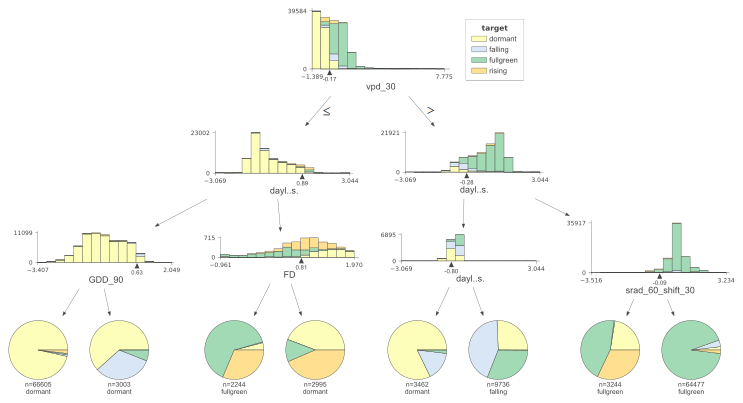

In [272]:
from dtreeviz.trees import dtreeviz # remember to load the package


viz = dtreeviz(clf, X_train, y_train_int,
                target_name="target",
                feature_names= feature_names,  
                   class_names=list(b))

viz
# clf_iris = tree.DecisionTreeClassifier(random_state=1234)
# model = clf_iris.fit(X, y)

# viz = dtreeviz(clf_iris, X, y,
#                 target_name="target",
#                 feature_names=iris.feature_names,
#                 class_names=list(iris.target_names))

# viz


In [124]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names= feature_names,  
#                    class_names=df_y.phases4.unique(),
#                    filled=True)
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= feature_names,  
                   class_names=df_y.phases4.unique(),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Decision Tree visualization with plot_tree from sklearn

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [9]:
#### TEST DIFFERENT MODELS
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20))
clf = clf.fit(X_train, y_train)
ys = clf.predict(X_test)
# print(clf.get_depth())
# print(clf.get_n_leaves())
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()


print(summary)
summary.apply(lambda x: x/x.sum(), axis=1)

actuals    dormant  falling  fullgreen  rising
0                                             
dormant    25137.0     86.0        1.0    95.0
falling       91.0   2639.0       97.0     NaN
fullgreen      NaN     90.0    21739.0    87.0
rising        82.0      NaN       67.0  1711.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.992812,0.003397,0.000039,0.003752
falling,0.032190,0.933498,0.034312,NaN
fullgreen,NaN,0.004107,0.991924,0.003970
rising,0.044086,NaN,0.036022,0.919892


In [249]:
np.array([x for x in range(30) if x % 2 == 0])/100


array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28])

In [245]:
## loop through training parameters


depths = np.array([x for x in range(28) if x % 2 == 0])[1:14 ]
precision_list = pd.DataFrame(columns = summary.columns)


for i in (depths) :
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i))
    clf = clf.fit(X_train, y_train)
    ys = clf.predict(X_test)
    # print(clf.get_depth())
    # print(clf.get_n_leaves())
    y_scoredf = pd.DataFrame(ys)
    y_scoredf['actuals'] = y_test
    summary = y_scoredf.value_counts().unstack()

    precision = [np.diag(np.array(summary.apply(lambda x: x/x.sum(), axis=1)))]
    precision = pd.DataFrame(precision, columns = summary.columns)
    precision['run'] = i

    precision_list = precision_list.append(precision)
    print(precision_list)

actuals   dormant   falling  fullgreen    rising  run
0        0.963234  0.214148   0.944708  0.176805  2.0
actuals   dormant   falling  fullgreen    rising  run
0        0.963234  0.214148   0.944708  0.176805  2.0
0        0.937347  0.380860   0.943256  0.356216  4.0
actuals   dormant   falling  fullgreen    rising  run
0        0.963234  0.214148   0.944708  0.176805  2.0
0        0.937347  0.380860   0.943256  0.356216  4.0
0        0.964022  0.508962   0.961362  0.535378  6.0
actuals   dormant   falling  fullgreen    rising  run
0        0.963234  0.214148   0.944708  0.176805  2.0
0        0.937347  0.380860   0.943256  0.356216  4.0
0        0.964022  0.508962   0.961362  0.535378  6.0
0        0.988722  0.748826   0.982744  0.778505  8.0
actuals   dormant   falling  fullgreen    rising   run
0        0.963234  0.214148   0.944708  0.176805   2.0
0        0.937347  0.380860   0.943256  0.356216   4.0
0        0.964022  0.508962   0.961362  0.535378   6.0
0        0.988722  0.748

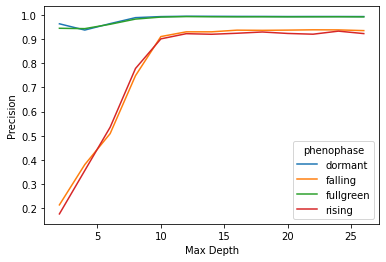

In [267]:
import seaborn as sb
plot_data = pd.melt(precision_list, id_vars = 'run', var_name = 'phenophase')
plot_data
ax = sb.lineplot(data=plot_data, x = 'run', y = 'value', hue = 'phenophase')
ax.set(xlabel='Max Depth', ylabel='Precision')
plt.show()

In [279]:
# impurity = np.array([x for x in range(30) if x % 2 == 0])/10000
# precision_list_imp = pd.DataFrame(columns = summary.columns)


# for i in (impurity) :
#     clf = AdaBoostClassifier(DecisionTreeClassifier(min_impurity_decrease=i,
#                                                    max_depth = 16))
#     clf = clf.fit(X_train, y_train)
#     ys = clf.predict(X_test)
#     # print(clf.get_depth())
#     # print(clf.get_n_leaves())
#     y_scoredf = pd.DataFrame(ys)
#     y_scoredf['actuals'] = y_test
#     summary = y_scoredf.value_counts().unstack()

#     precision = [np.diag(np.array(summary.apply(lambda x: x/x.sum(), axis=1)))]
#     precision = pd.DataFrame(precision, columns = summary.columns)
#     precision['run'] = i

#     precision_list_imp = precision_list_imp.append(precision)
#     print(precision_list_imp)

In [284]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_dt, digits=3))
print(classification_report(y_test, ys, digits=3))
print(classification_report(y_test, y_forest, digits=3))
print(classification_report(y_test, y_extra, digits=3))

              precision    recall  f1-score   support

     dormant      0.987     0.988     0.987     25310
     falling      0.882     0.867     0.874      2815
   fullgreen      0.984     0.985     0.985     21904
      rising      0.856     0.861     0.858      1893

    accuracy                          0.975     51922
   macro avg      0.927     0.925     0.926     51922
weighted avg      0.975     0.975     0.975     51922

              precision    recall  f1-score   support

     dormant      0.994     0.993     0.993     25310
     falling      0.933     0.942     0.937      2815
   fullgreen      0.992     0.993     0.992     21904
      rising      0.926     0.905     0.916      1893

    accuracy                          0.987     51922
   macro avg      0.961     0.958     0.960     51922
weighted avg      0.987     0.987     0.987     51922

              precision    recall  f1-score   support

     dormant      0.992     0.994     0.993     25310
     falling      0.9

In [273]:
clf_forest = RandomForestClassifier()
clf_forst = clf_forest.fit(X_train, y_train)
y_forest = clf_forest.predict(X_test)
# print(clf.get_depth())
# print(clf.get_n_leaves())
y_scoredf_forest = pd.DataFrame(y_forest)
y_scoredf_forest['actuals'] = y_test
summary_forest = y_scoredf_forest.value_counts().unstack()


print(summary)
summary_forest.apply(lambda x: x/x.sum(), axis=1)

actuals    dormant  falling  fullgreen  rising
0                                             
dormant    23997.0    427.0       34.0   179.0
falling      555.0   1882.0      946.0     NaN
fullgreen     52.0    506.0    20582.0   247.0
rising       706.0      NaN      342.0  1467.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.991680,0.004338,NaN,0.003983
falling,0.033357,0.922285,0.044358,NaN
fullgreen,0.000046,0.004837,0.990645,0.004472
rising,0.036066,NaN,0.038251,0.925683


In [274]:
clf_extra = ExtraTreesClassifier()
clf_extra = clf_extra.fit(X_train, y_train)
y_extra = clf_extra.predict(X_test)
# print(clf.get_depth())
# print(clf.get_n_leaves())
y_scoredf_extra = pd.DataFrame(y_extra)
y_scoredf_extra['actuals'] = y_test
summary_extra = y_scoredf_extra.value_counts().unstack()


print(summary_extra)
summary_extra.apply(lambda x: x/x.sum(), axis=1)

actuals    dormant  falling  fullgreen  rising
0                                             
dormant    25130.0    109.0        2.0    96.0
falling      100.0   2603.0      112.0     NaN
fullgreen      2.0    103.0    21709.0    89.0
rising        78.0      NaN       81.0  1708.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.991830,0.004302,0.000079,0.003789
falling,0.035524,0.924689,0.039787,NaN
fullgreen,0.000091,0.004703,0.991143,0.004063
rising,0.041778,NaN,0.043385,0.914837


In [278]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_dt = clf_dt.predict(X_test)
print(clf_dt.get_depth())
print(clf_dt.get_n_leaves())
y_scoredf_dt = pd.DataFrame(y_dt)
y_scoredf_dt['actuals'] = y_test
summary_dt = y_scoredf_dt.value_counts().unstack()


print(summary_dt)
summary_dt.apply(lambda x: x/x.sum(), axis=1)

26
3717
actuals    dormant  falling  fullgreen  rising
0                                             
dormant    24994.0    192.0       19.0   127.0
falling      159.0   2440.0      168.0     NaN
fullgreen     21.0    183.0    21580.0   137.0
rising       136.0      NaN      137.0  1629.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.986657,0.007579,0.000750,0.005013
falling,0.057463,0.881821,0.060716,NaN
fullgreen,0.000958,0.008348,0.984444,0.006250
rising,0.071504,NaN,0.072029,0.856467


In [277]:
clf_dt = DecisionTreeClassifier(max_depth = 16)
clf_dt = clf_dt.fit(X_train, y_train)
y_dt = clf_dt.predict(X_test)
print(clf_dt.get_depth())
print(clf_dt.get_n_leaves())
y_scoredf_dt = pd.DataFrame(y_dt)
y_scoredf_dt['actuals'] = y_test
summary_dt = y_scoredf_dt.value_counts().unstack()


print(summary_dt)
summary_dt.apply(lambda x: x/x.sum(), axis=1)

16
2684
actuals    dormant  falling  fullgreen  rising
0                                             
dormant    24913.0    171.0       18.0   158.0
falling      221.0   2367.0      276.0     NaN
fullgreen     31.0    277.0    21463.0   163.0
rising       145.0      NaN      147.0  1572.0


actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.986263,0.006770,0.000713,0.006255
falling,0.077165,0.826466,0.096369,NaN
fullgreen,0.001413,0.012629,0.978526,0.007431
rising,0.077790,NaN,0.078863,0.843348
